In [322]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [323]:
data = pd.read_csv('../dataset/fish_data.csv')

In [324]:
data.head()

,Fish Species,Price,Grade,Catching Method,Sustainability,Actual Price
0,Bawal Hitam,36000,B,Farmed,Moderately sustainable,30000
1,Bawal Putih,72000,B,Farmed,Moderately sustainable,60000
2,Cakalang,30000,B,Farmed,Moderately sustainable,25000
3,Kakap Merah,66000,B,Farmed,Moderately sustainable,55000
4,Kembung,30000,B,Farmed,Moderately sustainable,25000


In [325]:
data.shape

(264, 6)

In [326]:
data.isnull().sum()

Fish Species       0
Price              0
Grade              0
Catching Method    0
Sustainability     0
Actual Price       0
dtype: int64

In [327]:
data.describe()

,Price,Actual Price
count,264.000000,264.000000
mean,49903.363636,68454.545455
std,59375.759491,69461.411301
min,6000.000000,25000.000000
25%,19200.000000,30000.000000
50%,30200.000000,55000.000000
75%,55250.000000,70000.000000
max,403200.000000,280000.000000


In [328]:
sorted(data['Price'],reverse=True)

[403200,
 336000,
 336000,
 322560,
 280000,
 268800,
 268800,
 268800,
 224000,
 224000,
 215040,
 201600,
 179200,
 168000,
 168000,
 161280,
 140000,
 134400,
 134400,
 115200,
 112000,
 112000,
 100800,
 96000,
 96000,
 92160,
 89600,
 86400,
 86400,
 84000,
 84000,
 84000,
 80640,
 80000,
 79200,
 76800,
 76800,
 76800,
 72000,
 72000,
 72000,
 72000,
 70000,
 69120,
 69120,
 67200,
 67200,
 67200,
 67200,
 66000,
 66000,
 64000,
 64000,
 63360,
 61440,
 60000,
 60000,
 57600,
 57600,
 57600,
 57600,
 57600,
 57600,
 57600,
 56000,
 56000,
 55000,
 54720,
 53760,
 52800,
 52800,
 52800,
 51200,
 50400,
 48000,
 48000,
 48000,
 48000,
 48000,
 48000,
 46080,
 46080,
 46080,
 45600,
 45600,
 44800,
 44000,
 44000,
 43776,
 43200,
 43200,
 43200,
 43200,
 42240,
 42000,
 42000,
 40320,
 40000,
 39600,
 38400,
 38400,
 38400,
 38400,
 38000,
 36480,
 36480,
 36480,
 36000,
 36000,
 36000,
 36000,
 36000,
 36000,
 36000,
 36000,
 36000,
 36000,
 35200,
 35000,
 34560,
 34560,
 34560,
 

In [329]:
data['Fish Species'].unique()
data['Fish Species'] = data['Fish Species'].map({'Bawal Hitam':0,'Bawal Putih':1,'Cakalang':2,
                                                 "Kakap Merah":3,"Kembung":4,"Kerapu":5,
                                                 "Kuwe":6,"Makerel":7,"Salmon":8,
                                                 "Tenggiri":9,"Tongkol":10})

In [330]:
data['Grade'].unique()
data['Grade'] = data['Grade'].map({'C':0,'B':1,'A':2})

In [331]:
data['Sustainability'].unique()
data['Sustainability'] =data['Sustainability'].map({'Moderately sustainable':1,'Unsustainable':0})


In [332]:
data['Catching Method'].unique()
data['Catching Method'] = data['Catching Method'].map({'Farmed':3,'Netting':2, 'Spearfishing':0, 'Fishing Hook':1})

In [333]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaler2 = MinMaxScaler(feature_range=(0,1))
data['Actual Price'] = scaler.fit_transform(data[['Actual Price']])
data['Price'] = scaler2.fit_transform(data[['Price']])

In [334]:
data.head()

,Fish Species,Price,Grade,Catching Method,Sustainability,Actual Price
0,0,0.075529,1,3,1,0.019608
1,1,0.166163,1,3,1,0.137255
2,2,0.060423,1,3,1,0.000000
3,3,0.151057,1,3,1,0.117647
4,4,0.060423,1,3,1,0.000000


In [335]:
print(scaler.inverse_transform(data[['Actual Price']]))

[[ 30000.]
 [ 60000.]
 [ 25000.]
 [ 55000.]
 [ 25000.]
 [ 80000.]
 [ 70000.]
 [ 30000.]
 [280000.]
 [ 60000.]
 [ 38000.]
 [ 30000.]
 [ 60000.]
 [ 25000.]
 [ 55000.]
 [ 25000.]
 [ 80000.]
 [ 70000.]
 [ 30000.]
 [280000.]
 [ 60000.]
 [ 38000.]
 [ 30000.]
 [ 60000.]
 [ 25000.]
 [ 55000.]
 [ 25000.]
 [ 80000.]
 [ 70000.]
 [ 30000.]
 [280000.]
 [ 60000.]
 [ 38000.]
 [ 30000.]
 [ 60000.]
 [ 25000.]
 [ 55000.]
 [ 25000.]
 [ 80000.]
 [ 70000.]
 [ 30000.]
 [280000.]
 [ 60000.]
 [ 38000.]
 [ 30000.]
 [ 60000.]
 [ 25000.]
 [ 55000.]
 [ 25000.]
 [ 80000.]
 [ 70000.]
 [ 30000.]
 [280000.]
 [ 60000.]
 [ 38000.]
 [ 30000.]
 [ 60000.]
 [ 25000.]
 [ 55000.]
 [ 25000.]
 [ 80000.]
 [ 70000.]
 [ 30000.]
 [280000.]
 [ 60000.]
 [ 38000.]
 [ 30000.]
 [ 60000.]
 [ 25000.]
 [ 55000.]
 [ 25000.]
 [ 80000.]
 [ 70000.]
 [ 30000.]
 [280000.]
 [ 60000.]
 [ 38000.]
 [ 30000.]
 [ 60000.]
 [ 25000.]
 [ 55000.]
 [ 25000.]
 [ 80000.]
 [ 70000.]
 [ 30000.]
 [280000.]
 [ 60000.]
 [ 38000.]
 [ 30000.]
 [ 60000.]
 [ 25000.]

In [336]:
data

,Fish Species,Price,Grade,Catching Method,Sustainability,Actual Price
0,0,0.075529,1,3,1,0.019608
1,1,0.166163,1,3,1,0.137255
2,2,0.060423,1,3,1,0.000000
3,3,0.151057,1,3,1,0.117647
4,4,0.060423,1,3,1,0.000000
...,...,...,...,...,...,...
259,6,0.041289,0,1,0,0.176471
260,7,0.009063,0,1,0,0.019608
261,8,0.210473,0,1,0,1.000000
262,9,0.033233,0,1,0,0.137255


In [337]:
X = data.drop(['Price', 'Fish Species', 'Catching Method'],axis=1)
y = data['Price']
print(X.head())
print(y.head())

   Grade  Sustainability  Actual Price
0      1               1      0.019608
1      1               1      0.137255
2      1               1      0.000000
3      1               1      0.117647
4      1               1      0.000000
0    0.075529
1    0.166163
2    0.060423
3    0.151057
4    0.060423
Name: Price, dtype: float64


In [338]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [339]:
import tensorflow as tf

In [340]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=[3]),
    tf.keras.layers.Dense(1, activation='linear')
])

In [341]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mean_squared_error', metrics=['mse'])

In [342]:
import numpy as np

In [343]:
history = model.fit(X_train, y_train,validation_data=[X_test,y_test], epochs=100)

Epoch 1/100


7/7 [==============================] - 1s 31ms/step - loss: 0.3681 - mse: 0.3681 - val_loss: 0.4283 - val_mse: 0.4283
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 0.2690 - mse: 0.2690 - val_loss: 0.3142 - val_mse: 0.3142
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 0.1921 - mse: 0.1921 - val_loss: 0.2236 - val_mse: 0.2236
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 0.1315 - mse: 0.1315 - val_loss: 0.1586 - val_mse: 0.1586
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0893 - mse: 0.0893 - val_loss: 0.1131 - val_mse: 0.1131
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0624 - mse: 0.0624 - val_loss: 0.0824 - val_mse: 0.0824
Epoch 7/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0440 - mse: 0.0440 - val_loss: 0.0627 - val_mse: 0.0627
Epoch 8/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0328 - mse: 0.0328 - val_loss: 0.

(0.0, 50.0)

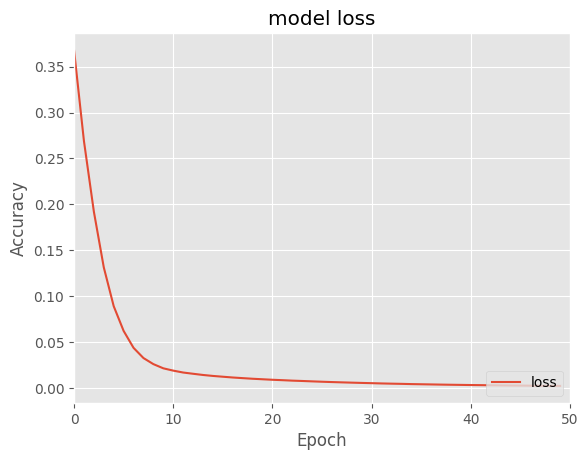

In [344]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.title('model loss')
plt.plot(history.history['mse'][:50], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.xlim(0, 50)


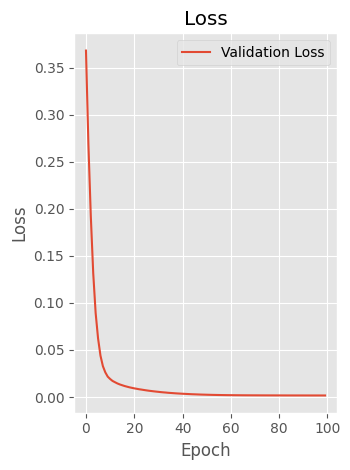

In [345]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Validation Loss')

plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [346]:
y_pred1 = model.predict(X_test)

2/2 [==============================] - 0s 2ms/step


In [347]:
score1 = metrics.r2_score(y_test,y_pred1)
print(score1)

0.8693862797487015


In [348]:
# model.save('pricepredictor.h5')

In [349]:
# model = tf.keras.models.load_model('pricepredictor.h5')

In [350]:
data_new = pd.DataFrame({
    'Grade':0,
    'Sustainability':0,
    'Actual Price' : 10000

},index=[0])

grade = data_new.at[0, 'Grade']
sustainability = data_new.at[0, 'Sustainability']
actual_price = data_new.at[0, 'Actual Price']

if grade == 0 or grade > 2 or sustainability > 1 or actual_price == 0:
    price = 0

elif actual_price < 11000:
    price = 0

else:
    data_new['Actual Price'] = scaler.transform(data_new[['Actual Price']])
    prediction = model.predict(data_new)
    prediction = scaler2.inverse_transform(prediction)
    price = round(prediction.item(), 1)

print(price)

0
